Завдання на практичну роботу "Основи TensorFlow та Deep Learning":

Завдання:

1. Встановлення TensorFlow:

    Встановіть TensorFlow на вашому комп'ютері або віртуальному середовищі.
2. Ознайомлення з TensorFlow:

    Вивчіть основні концепції TensorFlow, такі як тензори, операції та графи обчислень.
    Створіть тензори різних типів та виконайте над ними операції.

In [9]:
import tensorflow as tf

# Включення режиму Eager Execution
tf.compat.v1.disable_eager_execution()

# Створення тензорів
tensor_a = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
tensor_b = tf.Variable([[5, 6], [7, 8]], dtype=tf.float32)

# Виконання операцій
tensor_sum = tf.add(tensor_a, tensor_b)
tensor_product = tf.matmul(tensor_a, tensor_b)

# Виведення результатів
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())  # Ініціалізація змінних
    result_sum, result_product = sess.run([tensor_sum, tensor_product])
    print("Сума тензорів:")
    print(result_sum)
    print("\nДобуток тензорів:")
    print(result_product)


Сума тензорів:
[[ 6.  8.]
 [10. 12.]]

Добуток тензорів:
[[19. 22.]
 [43. 50.]]


3. Побудова моделі для регресії:

   Використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.

    Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.

    Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.

    Оцініть результати навчання та відобразіть їх графічно.

    Порівняйте з результатами, отриманими у лабораторній роботі 2.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Training Loss (MSE) on Training Data: 2.7710094690322875
Test Loss (MSE) on Test Data: 2.798350257873535


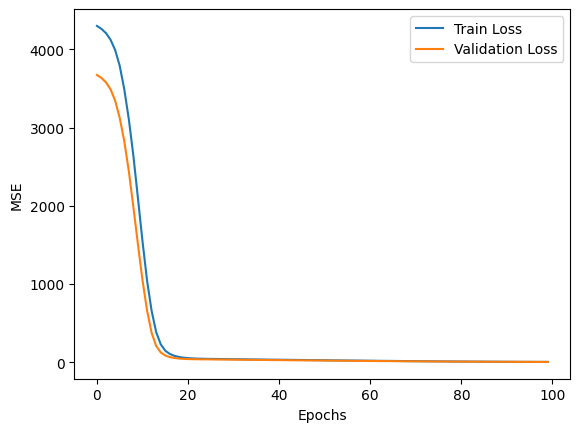

In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Генерація даних для регресії (використовуємо згенерований у лабораторній роботі 2 набір даних)
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

data = pd.DataFrame(X, columns=[f"Feature{i+1}" for i in range(5)])
data['Target'] = y

data.to_csv('regression_data.csv', index=False)

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення та компіляція моделі нейронної мережі для регресії
model_regression = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],), name="input_layer"),
    tf.keras.layers.Dense(32, activation='relu'),  # Збільшено кількість нейронів
    tf.keras.layers.Dense(16, activation='relu'),  # Зменшено кількість нейронів
    tf.keras.layers.Dense(1)
])

model_regression.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі
history_regression = model_regression.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Оцінка моделі на тренувальних та тестових даних
train_loss = model_regression.evaluate(X_train, y_train, verbose=0)
print("Training Loss (MSE) on Training Data:", train_loss)
test_loss = model_regression.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MSE) on Test Data:", test_loss)

# Візуалізація результатів навчання
plt.plot(history_regression.history['loss'], label='Train Loss')
plt.plot(history_regression.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()




Model Regression: MSE = 0.01, R^2 = 1.00 Лаба 2

Training Loss (MSE) on Training Data: 2.7710094690322875
Test Loss (MSE) on Test Data: 2.798350257873535

4. Побудова моделі для класифікації:

використайте згенерований у ллабораторній роботі 3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 3.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Training Loss (Accuracy) on Training Data: [0.1388422090560198, 0.955]
Test Loss (Accuracy) on Test Data: [0.20491169393062592, 0.94]


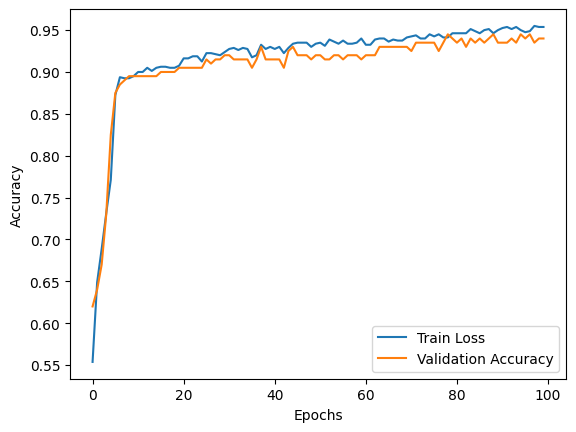

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Згенеруємо набір даних для бінарної класифікації
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(2)])
data['Target'] = y

data.to_csv('binary_data.csv', index=False)

# Розділімо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення та компіляція моделі нейронної мережі для регресії
model_regression = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],), name="input_layer"),
    tf.keras.layers.Dense(32, activation='relu'),  # Збільшено кількість нейронів
    tf.keras.layers.Dense(16, activation='relu'),  # Зменшено кількість нейронів
    tf.keras.layers.Dense(1)
])

model_regression.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_regression = model_regression.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Оцінка моделі на тренувальних та тестових даних
train_loss = model_regression.evaluate(X_train, y_train, verbose=0)
print("Training Loss (Accuracy) on Training Data:", train_loss)
test_loss = model_regression.evaluate(X_test, y_test, verbose=0)
print("Test Loss (Accuracy) on Test Data:", test_loss)

# Візуалізація результатів навчання
plt.plot(history_regression.history['accuracy'], label='Train Loss')
plt.plot(history_regression.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
